# Sinais periódicos

Neste notebook avaliaremos os sinais periódicos e quais são as condições necessárias para periodicidade. 

Esta propriedade dos sinais está ligada ao ***deslocamento no tempo***, uma transformação da variável independente.

Um sinal periódico, contínuo, é aquele para o qual a seguinte propriedade é válida:
    
\begin{equation}
x(t) = x(t \pm mT_p),
\end{equation}
ou seja, o valor do sinal no instante $t$ [s] é o mesmo para o instante $t \pm mT_p$ [s]. Dessa forma, o sinal se repete a cada
período $T_p$.

$T_p$ é o chamado período fundamental do sinal periódico. Neste caso, $x(t) = x(t \pm T_p) = x(t \pm 2T_p) = ... = x(t \pm kT_p)$.

Para os sinais discretos a definição é análoga:

\begin{equation}
x[n] = x[n \pm m N_p],
\end{equation}
com $N_p$ sendo um número de amostras inteiro.

Um sinal que não é periódico é chamado de aperiódico. 

Vamos ver alguns exemplos de sinais periódicos contínuos e discretos.

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
from scipy import signal # some signals
import IPython.display as ipd # to play signals

In [53]:
# Configurações gerais
fs = 44100
t = np.arange(start = 0, stop = 1, step = 1/fs) # vetor temporal
freq = 250 # Frequencia fundamental

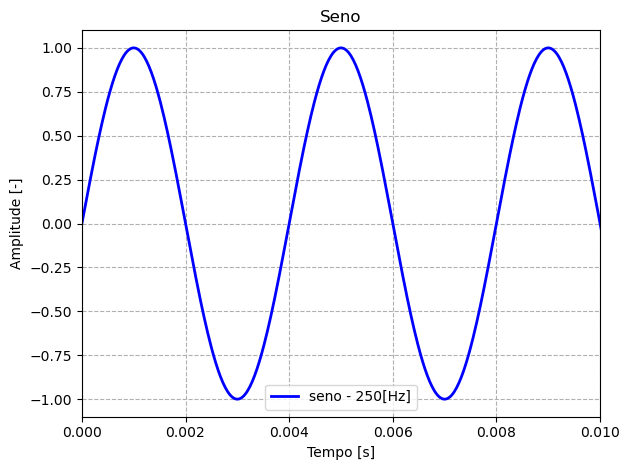

In [55]:
# seno ou cosseno
xt = np.sin(2*np.pi*freq*t)
# Figura
plt.figure()
plt.title('Seno')
plt.plot(t, xt, '-b', linewidth = 2, label = 'seno - ' + str(int(freq)) + '[Hz]')
plt.legend(loc = 'best')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 0.01))
plt.tight_layout()
plt.show()
# play
ipd.Audio(xt, rate=fs) # load a NumPy array

## Um seno com 2 frequências
Se tivermos um sinal

\begin{equation}
x(t) = x(t) = \mathrm{sin}(2  \pi \ m_1 \ f t) + \mathrm{sin}(2  \pi \ m_2 \ f t),
\end{equation}

ele será um sinal periódico desde que $\frac{m_2}{m_1}$ seja um número racional. Do contrário, o sinal será quase-periódico. Ele parecerá periódico, mas se você olhar os detalhes, vai notar que o sinal nunca se repete.


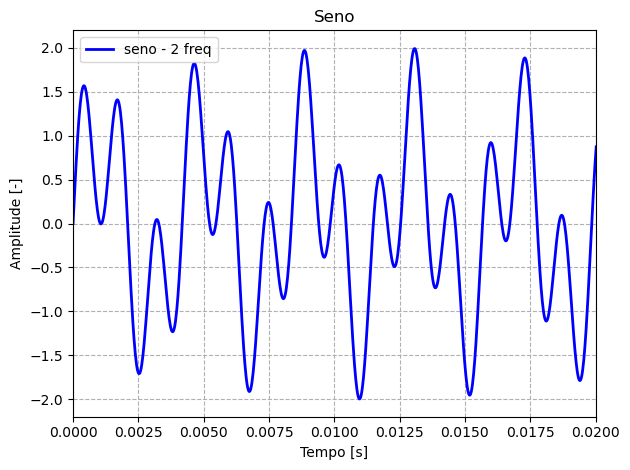

In [31]:
# seno ou cosseno - 2 frequencias
m = 2*np.sqrt(2)
xt = np.sin(2*np.pi*freq*t) +  np.sin(2*np.pi*m*freq*t) 
# Figura
plt.figure()
plt.title('Seno')
plt.plot(t, xt, '-b', linewidth = 2, label = 'seno - 2 freq')
plt.legend(loc = 'best')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 5/freq))
plt.tight_layout()
plt.show()
# play
ipd.Audio(xt, rate=fs) # load a NumPy array

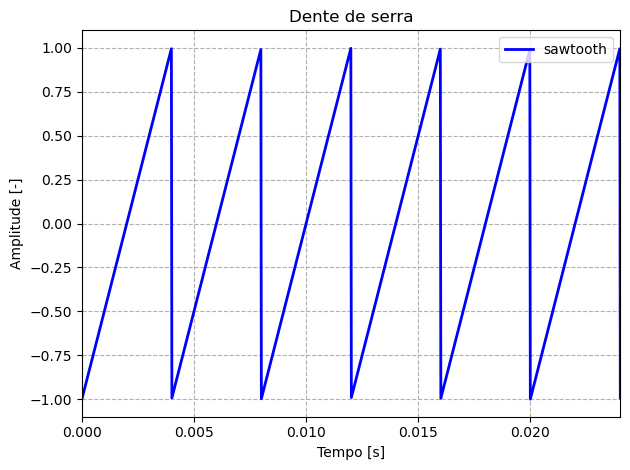

In [37]:
# dente de serra
xt = signal.sawtooth(2 * np.pi * freq * t)
# Figura
plt.figure()
plt.title('Dente de serra')
plt.plot(t, xt, '-b', linewidth = 2, label = 'sawtooth')
plt.legend(loc = 'best')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 6/freq))
plt.tight_layout()
plt.show()
# play
ipd.Audio(xt, rate=fs) # load a NumPy array

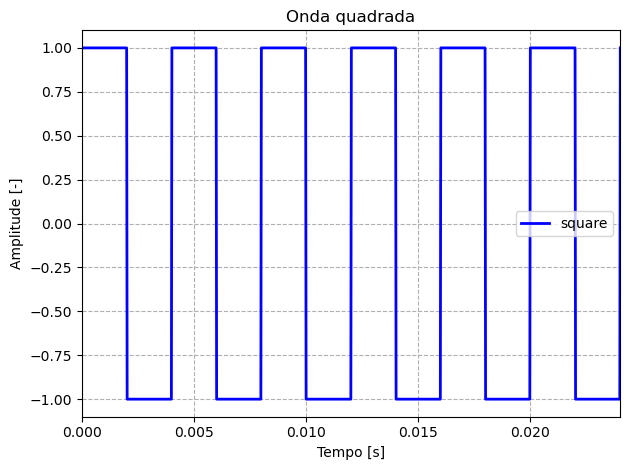

In [39]:
# onda quadrada
xt = signal.square(2 * np.pi * freq * t)
# Figura
plt.figure()
plt.title('Onda quadrada')
plt.plot(t, xt, '-b', linewidth = 2, label = 'square')
plt.legend(loc = 'best')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, 6/freq))
plt.tight_layout()
plt.show()
# play
ipd.Audio(xt, rate=fs) # load a NumPy array

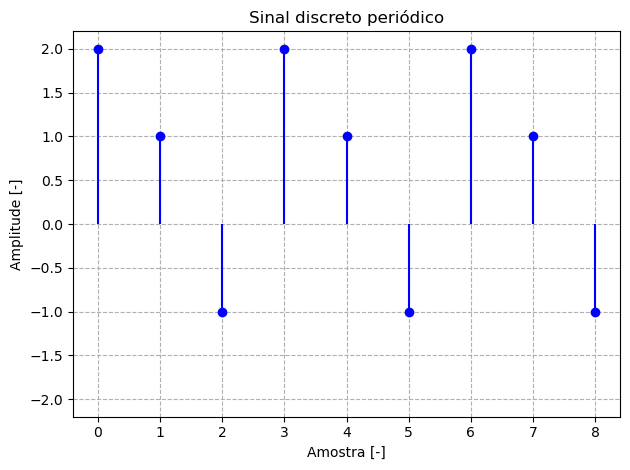

In [45]:
N = 9
n = np.arange(N)
xn = [2, 1, -1, 2, 1, -1, 2, 1, -1]

# Figura
plt.figure()
plt.title('Sinal discreto periódico')
plt.stem(n, xn, '-b', basefmt=" ")
plt.grid(linestyle = '--', which='both')
plt.xlabel('Amostra [-]')
plt.ylabel('Amplitude [-]')
plt.ylim((-2.2, 2.2))
plt.tight_layout()
plt.show()

## Sinais discretos periódicos

A periodicidade em sinais discretos tem um limite prático. Pra pensar nisso, podemos imaginar um sinal contínuo $x(t) = \mathrm{cos}(\omega t)$. À medida que a frequência, $f$, do sinal aumenta, sua taxa de oscilação também aumenta. Mas, o que aconteceria no caso de um sinal do tipo

\begin{equation}
x[n] = \mathrm{cos}(\omega n) \ ?
\end{equation}





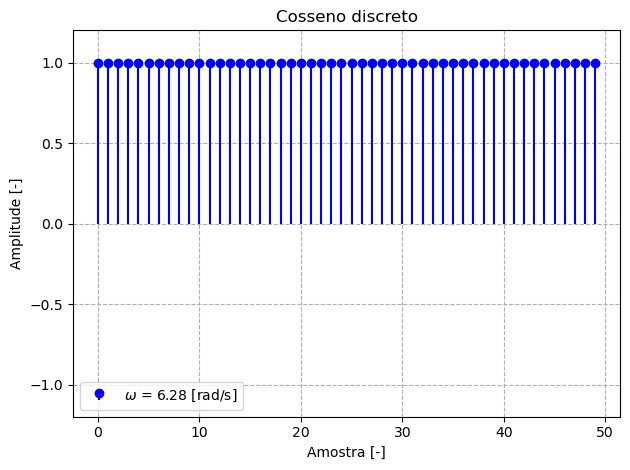

In [87]:
N = 50
n = np.arange(N)
factor = [0, 1, 2, 4, 8, 12, 14, 15, 16]

w = factor[8]*np.pi/8
xn = np.cos(w*n)

# Figura
plt.figure()
plt.title('Cosseno discreto')
plt.stem(n, xn, '-b', label = r'$\omega$ = {:.3} [rad/s]'.format(float(w)), basefmt=" ")
plt.legend(loc = 'best')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Amostra [-]')
plt.ylabel('Amplitude [-]')
plt.ylim((-1.2, 1.2))
plt.tight_layout()
plt.show()

# Note o seguinte:

Para um sinal contínuo, à medida que a frequência aumenta, a taxa de oscilação do sinal também aumenta. Você pode aumentar a frequência indefinidamente e a taxa de oscilação (ciclos por segundo) vai aumentar também.

Para um sinal discreto este **não** é o caso. No começo você aumenta a frequência e a taxa de oscilação aumenta. O limite é ter uma amostra positiva e outra negativa. Como só podemos ter amostras com índices inteiros ($\in \mathcal{Z}$), não é possível oscilar mais rápido que isso. Assim, ao aumentar a frequência angular acima de $\omega = \pi$ [rad/s], a taxa de oscilação começa a diminiur.

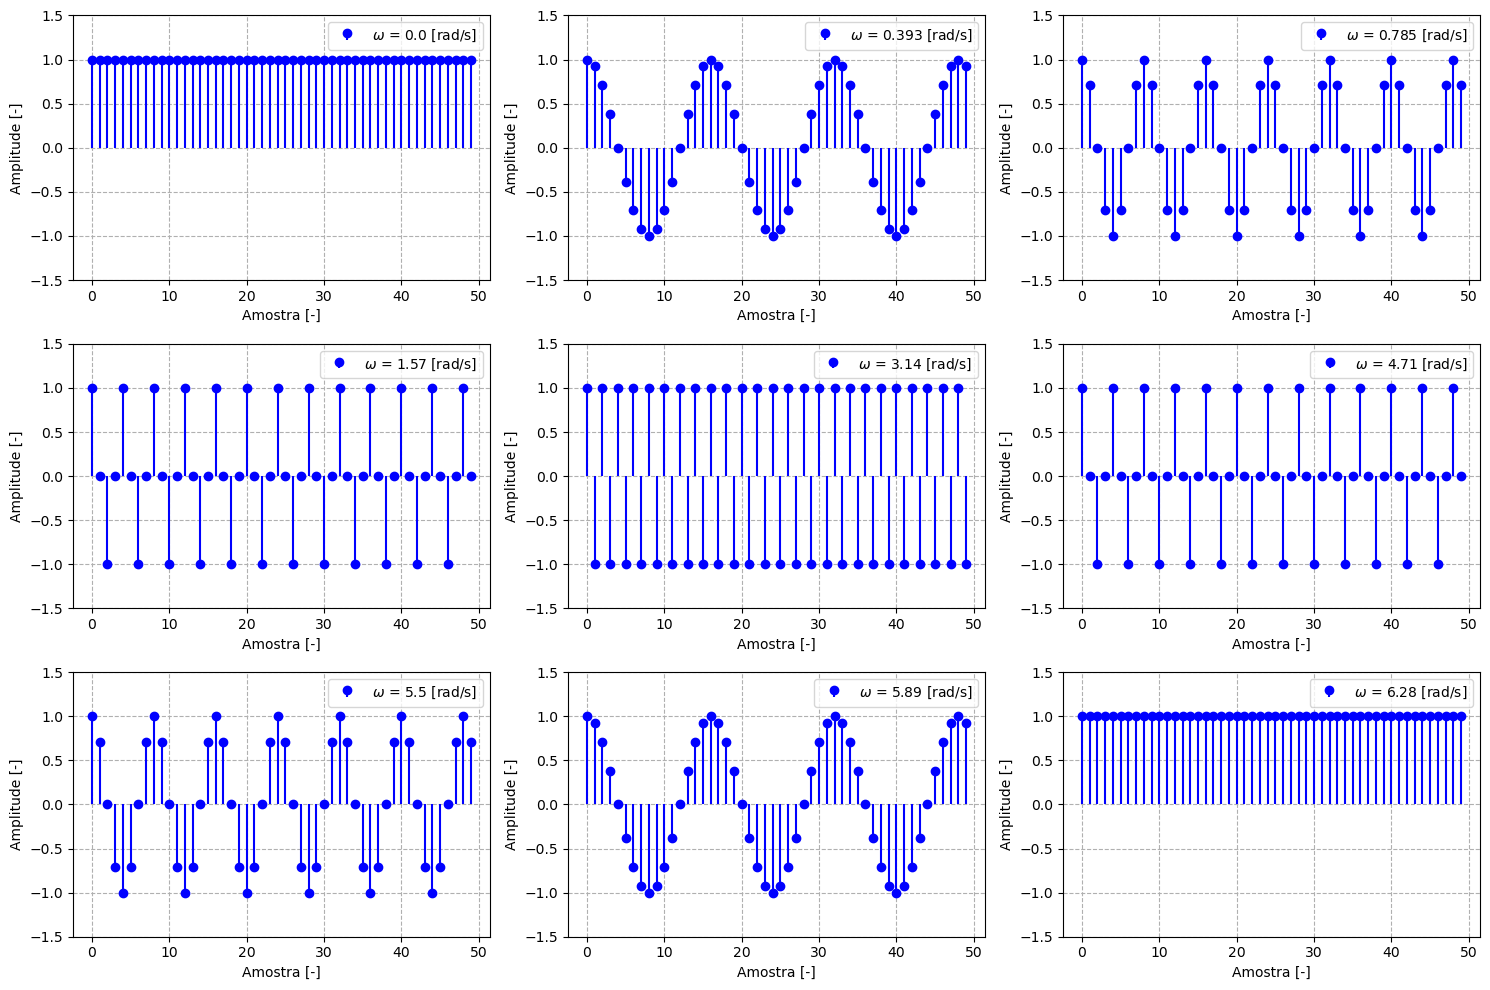

In [138]:
omega = [0, np.pi/8, np.pi/4, np.pi/2, np.pi, 
         3*np.pi/2, 7*np.pi/4, 15*np.pi/8, 2*np.pi]#np.linspace(0, 2*np.pi, 9) # Frequencias angulares
n = np.arange(50) # amostras

plt.figure(figsize=(15,10))
for jw,w in enumerate(omega):
    xn = np.cos(w*n)
    
    plt.subplot(3,3,jw+1)
    plt.stem(n, xn, '-b', label = r'$\omega$ = {:.3} [rad/s]'.format(float(w)), basefmt=" ")
    plt.legend(loc = 'upper right')
    plt.grid(linestyle = '--', which='both')
    plt.xlabel('Amostra [-]')
    plt.ylabel('Amplitude [-]')
    plt.ylim((-1.5, 1.5))
    plt.tight_layout()
    
plt.show()